# Predefined palette

This is a single cell notebook to demonstrate temperature plotting using Magics' predefined palette.

At ECMWF  

From your workstation:
--------------

load python3  
module swap (or load) Magics/new   
jupyter notebook  

load this notebook



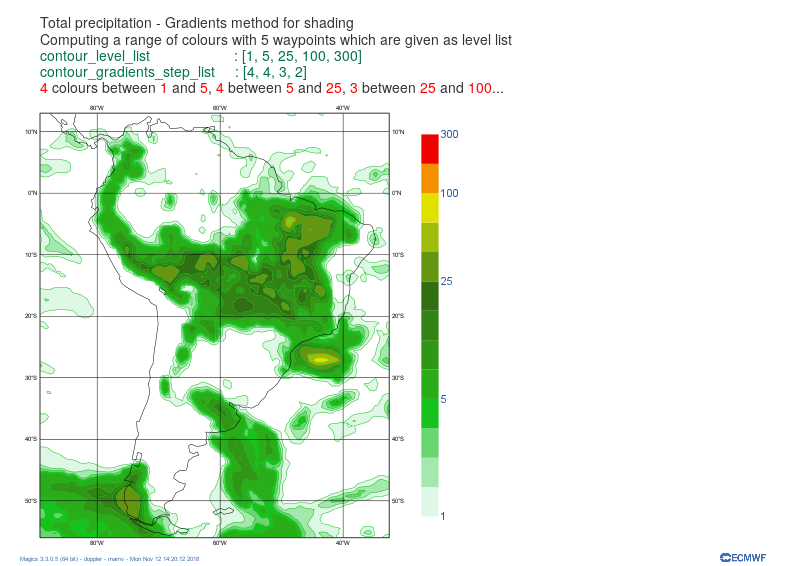

In [1]:
import Magics.macro as magics

#Setting the geographical area
projection = magics.mmap(
    subpage_map_library_area = "on",
    subpage_map_area_name = "south_america"
)

#Setting the coastline
coast = magics.mcoast()

#Loading GRIB file
tp = magics.mgrib(grib_input_file_name = "total_precipitation.grib")

#Defining the contour
contour = magics.mcont(
    legend                            = "on",
    contour_line_colour               = "RGB(0.08637,0.7607,0.1201)",
    contour_highlight                 = "off",
    contour_level_selection_type      = "level_list",
    contour_level_list                = [1.,5.,25.,100.,300.],
    contour_label                     = "off",
    contour_shade                     = "on",
    contour_shade_colour_method       = "gradients",
    contour_gradients_technique       = "hcl",
    contour_shade_method              = "area_fill",
    contour_gradients_colour_list     = ["RGB(0.8739,0.9692,0.8946)","RGB(0.08637,0.7607,0.1201)","RGB(0.1949,0.4348,0.07497)","RGB(0.8824,0.8824,0)","RGB(0.9412,0,0)"],
    contour_gradients_waypoint_method = "left",
    contour_gradients_step_list       = [4,4,3,2]
    )

#Defining the legend
legend = magics.mlegend(
    legend_display_type        = "continuous",
    legend_box_mode            = "automatic",
    legend_automatic_position  = "right",
    legend_text_composition    = "user_text_only",
    legend_values_list         = [1.,5.,25.,100.,300.],
    legend_text_font_size      = "0.45",
    legend_text_colour         = "#2b619e",    
    legend_entry_border        = "on",
    legend_entry_border_colour = "none") 

#Setting the title
title = magics.mtext( 
    text_lines          = ["Total precipitation - Gradients method for shading", 
                           "Computing a range of colours with 5 waypoints which are given as level list",
                           "<font colour='evergreen'>contour_level_list                     : [1, 5, 25, 100, 300]</font>",
                           "<font colour='evergreen'>contour_gradients_step_list     : [4, 4, 3, 2]</font>",
                           "<font colour='red'>4</font> colours between <font colour='red'>1</font> and <font colour='red'>5</font>, <font colour='red'>4</font> between <font colour='red'>5</font> and <font colour='red'>25</font>, <font colour='red'>3</font> between <font colour='red'>25</font> and <font colour='red'>100</font>..."],
    text_justification  = 'left',
    text_font_size      = 0.6,
    text_mode           = "automatic",
    text_colour         = "charcoal") 

#Plotting
magics.plot(projection, tp, contour, coast, legend, title)